In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import scipy
import matplotlib.pyplot as plt
import sklearn
import sklearn.neural_network

In [2]:
WindData = pd.read_csv('HovsoreData_Sonic_100m_2004-2013.csv')

In [3]:
# Filter rows where 'Wsp' is less than or equal to 35 m/s
filtered_WindData = WindData[WindData['Wsp'] <= 35]

# Save the filtered data to a new CSV file
filtered_csv_file = 'FilteredWindData.csv'
filtered_WindData.to_csv(filtered_csv_file, index=False)

WindData = filtered_WindData

In [4]:
U = WindData['Wsp']

In [15]:
Umean = np.mean(U)
Ustd = np.std(U)

n = len(U) # Count the number of samples


print("Umean = ", Umean)
print("Ustd = ", Ustd)
print("n = ", n)

Umean =  8.70904994116735
Ustd =  4.6725396044756895
n =  438532


In [7]:
alpha =  1 - 0.95# Corresponding to 95% probability  ( alpha = 1-p)

In [21]:
Nbootstrap = 1000 #99999
BootstrapSize = len(U)

Bsample = np.random.randint(low = 0, high = 8, size = (Nbootstrap,BootstrapSize))
BootstrapSample = np.zeros((Nbootstrap,BootstrapSize))
for i in range(Nbootstrap):
    for j in range(BootstrapSize):
        BootstrapSample[i,j] = U[Bsample[i,j]]
        
#BootstrapSample = 

BootstrapMeans = np.mean(BootstrapSample, axis=1)
BootstrapMeans = np.sort(BootstrapMeans)

Rlow = int((Nbootstrap+1) * (alpha/2) )
Rhigh = int((Nbootstrap+1) * (1-alpha/2))

CIn_B = BootstrapMeans[Rlow]
CIp_B = BootstrapMeans[Rhigh]

print('Confidence interval based on bootstrapping: [' + str(CIn_B) + ', ' + str(CIp_B) + ']')

Confidence interval based on bootstrapping: [10.09898043859969, 10.101488427298353]


In [17]:
# Confidence intervals using directly the Standard Normal distribution
k_alpha = stats.norm.ppf(alpha/2)
k_alpha_p = - stats.norm.ppf(1-alpha/2)

CIn_N = Umean + k_alpha * (Ustd/(np.sqrt(n)))
CIp_N = Umean - k_alpha * (Ustd/(np.sqrt(n)))

print('Confidence interval based on the Normal distribution: [' + str(CIn_N) + ', ' + str(CIp_N) + ']')

Confidence interval based on the Normal distribution: [8.695220633542869, 8.722879248791832]


ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of labels (2).

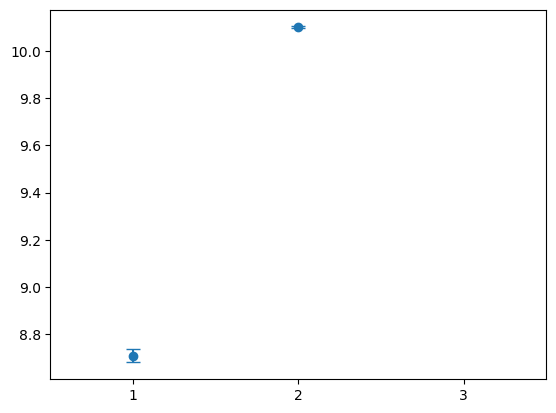

In [19]:
# Plot errorbars
fig0, ax0 = plt.subplots()
ax0.errorbar([1, 2], [Umean, np.mean(BootstrapMeans)],
             yerr = [(CIp_N - CIn_N), (CIp_B - CIn_B)],
            linestyle = '',marker = 'o',capsize = 5)
ax0.set_xlim([0.5,3.5])
ax0.set_xticks([1,2,3])
ax0.set_xticklabels(['Normal dist.','Bootstrapping'])
ax0.set_ylabel('Annual mean wind speed [m/s]')
plt.show()

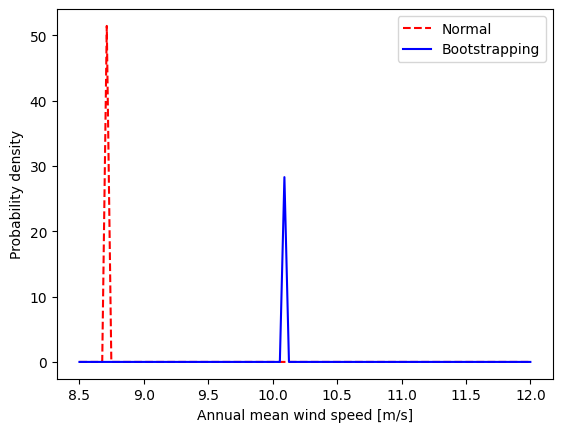

In [14]:
# Plot pdfs

Ubins = np.linspace(8.5,12,100)

pdf_N = stats.norm.pdf(Ubins,Umean,Ustd/np.sqrt(n))
dU = Ubins[1]-Ubins[0] # Scaling factor for the t-pdf to make sure we get a valid pdf for every bin spacing
pdf_T = (1/np.sqrt(dU))*stats.t.pdf((Ubins - Umean)/(Ustd/np.sqrt(n)), n - 1)

# Generating an empirical pdf from the bootstrap sample
BootstrapHist = np.histogram(BootstrapMeans,bins = Ubins)
BootstrapDist = stats.rv_histogram(BootstrapHist)
pdf_B = BootstrapDist.pdf(Ubins)

fig1, ax1 = plt.subplots()
p11 = ax1.plot(Ubins,pdf_N,'--r', label = 'Normal')
p12 = ax1.plot(Ubins,pdf_B,'-b', label = 'Bootstrapping')
plt.xlabel('Annual mean wind speed [m/s]')
plt.ylabel('Probability density')
plt.legend()

plt.show()